In [13]:
#Importing Dependencies
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [14]:
student_dataset=pd.read_csv('Startups.csv',sep=',')
print(student_dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [15]:
dummy_val = pd.get_dummies(student_dataset['State'])
dummy_val

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [16]:
merged_dataset = pd.concat([student_dataset, dummy_val],axis=1)
merged_dataset

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [17]:
final_dataset = merged_dataset.drop(['State', 'New York'], axis=1)
final_dataset

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


In [18]:
x = final_dataset.drop(['Profit'], axis=1)
y= final_dataset['Profit']

In [19]:
best_acc = 0
for i in range(1000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x , y , test_size= 0.2)
    Nexus = linear_model.LinearRegression()
    Nexus.fit(x_train,y_train)
    accuracy = Nexus.score(x_test,y_test)
    if(accuracy>best_acc):
        best_acc=accuracy
        with open('Nexus_Model.pickle','wb') as f:
            pickle.dump(Nexus, f)
print("The Best Accuracy is : ",best_acc*100)   

The Best Accuracy is :  98.99070356873699


In [20]:
pickle_in=open('Nexus_Model.pickle','rb')
Nexus=pickle.load(pickle_in)

In [21]:
print("Coefficients : ",Nexus.coef_)
print("Intercept : ",Nexus.intercept_)

Coefficients :  [ 8.25165699e-01 -3.32940089e-02  2.51869983e-02  1.40951412e+03
  6.83158004e+02]
Intercept :  49138.0731391006


In [22]:
predictions = Nexus.predict(x_test)
for i in range(len(predictions)):
    print("Predicted value :",predictions[i],'Actual value :',y_test.iat[i])

Predicted value : 156382.50599661953 Actual value : 149759.96
Predicted value : 97587.74478251924 Actual value : 96778.92
Predicted value : 109702.09220783506 Actual value : 108733.99
Predicted value : 47790.5013633527 Actual value : 14681.4
Predicted value : 89452.06633554277 Actual value : 96479.51
Predicted value : 74680.00507007148 Actual value : 78239.91
Predicted value : 99422.11013606781 Actual value : 99937.59
Predicted value : 70580.43709149113 Actual value : 71498.49
Predicted value : 115337.54513402678 Actual value : 122776.86
Predicted value : 114430.7756725649 Actual value : 110352.25


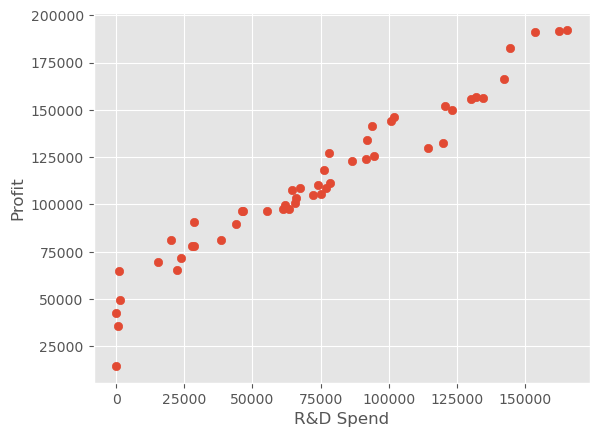

In [23]:
style.use("ggplot")
plt.scatter(student_dataset['R&D Spend'],student_dataset['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()